In [72]:
import torch
import numpy as np
import torch.nn as nn
import math
import matplotlib.pyplot as plt


In [73]:
plt.style.use('dark_background')

In [74]:
device = "cuda"

In [75]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10.0) / d_model))
        pe = torch.zeros(size=(max_len, 1, d_model))
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        pe = (pe + 1.0) / 2.0
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x + self.pe[:x.size(0)]
        print(self.pe.shape)
        return self.dropout(x)

In [76]:
example = torch.rand(size=(1, 2000, 512), device=device)

In [77]:
pe = PositionalEncoding(d_model=512).to(device)

In [78]:
out = pe(example)

torch.Size([5000, 1, 512])


In [79]:
example

tensor([[[0.1553, 0.4726, 0.0728,  ..., 0.8164, 0.0126, 0.6088],
         [0.5630, 0.2518, 0.6771,  ..., 0.8590, 0.1205, 0.4187],
         [0.2619, 0.9516, 0.9161,  ..., 0.0590, 0.7451, 0.0344],
         ...,
         [0.6575, 0.3622, 0.7467,  ..., 0.7594, 0.6375, 0.9779],
         [0.4832, 0.1039, 0.5718,  ..., 0.0870, 0.6954, 0.5688],
         [0.6765, 0.8409, 0.0081,  ..., 0.4844, 0.7431, 0.3515]]],
       device='cuda:0')

In [80]:
out

tensor([[[0.7281, 1.6363, 0.6365,  ..., 2.0182, 0.5696, 1.7875],
         [1.1811, 1.3909, 1.3079,  ..., 2.0655, 0.6895, 1.5763],
         [0.0000, 2.1684, 1.5735,  ..., 1.1766, 1.3834, 1.1494],
         ...,
         [1.2861, 1.5136, 1.3852,  ..., 1.9549, 0.0000, 2.1977],
         [1.0925, 1.2266, 0.0000,  ..., 1.2078, 1.3282, 1.7431],
         [1.3072, 0.0000, 0.0000,  ..., 1.6494, 1.3812, 1.5017]]],
       device='cuda:0')

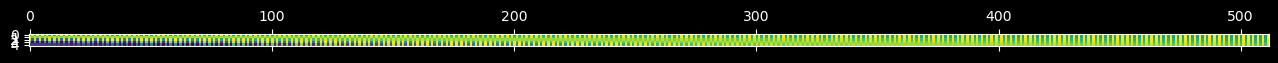

In [82]:
pe = PositionalEncoding(d_model=512).to(device)
cax = plt.matshow(pe.pe.cpu().squeeze(dim=1)[:5])
# plt.gcf().colorbar(cax)

In [ ]:
level_example=torch.rand()